# Machine Learning in the Real World

#               1. Data preparation and cleaning (Pre Processing )

### Import Python Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model as lm
from sklearn import metrics, preprocessing, svm


%matplotlib inline

### Data Loading

In [4]:
train_raw_data = pd.read_table('train.tsv')
test_raw_data = pd.read_table('test.tsv')
train_data = train_raw_data.copy()
train_labels = train_raw_data[['urlid', 'label']]
test_data = test_raw_data.copy()
# all_data = train_data.append(test_data, ignore_index = True)

### Replace missing values to NaN

In [5]:
# missing values are appearing as '?', replace them with np.nan
for variable in test_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)
    test_data[variable] = test_data[variable].replace('?', np.nan)

## Type Conversion

In [6]:
train_data[:].dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

### Specifying Data Types

In [15]:
irrelevant_variables = ["urlid"] # lengthyLinkDomain?
string_variables = ["url", "boilerplate"]
numeric_variables = ["alchemy_category_score", "avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", "compression_ratio", "embed_ratio", "frameTagRatio", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", "numwords_in_url", "parametrizedLinkRatio", "spelling_errors_ratio", "html_ratio", "image_ratio"]
categorical_variables = ["alchemy_category"]
binary_variables = ["framebased", "hasDomainLink", "is_news", "lengthyLinkDomain", "news_front_page"]

numeric_variables = list(test_data)[4:]

for variable in numeric_variables:
        train_data[variable] = train_data[variable].astype(np.float)
        test_data[variable] = test_data[variable].astype(np.float)

## Missing Data Imputation

In [8]:
print (np.sum(test_data[:].isnull()))

url                                  0
urlid                                0
boilerplate                          0
alchemy_category                  1046
alchemy_category_score            1046
avglinksize                          0
commonlinkratio_1                    0
commonlinkratio_2                    0
commonlinkratio_3                    0
commonlinkratio_4                    0
compression_ratio                    0
embed_ratio                          0
framebased                           0
frameTagRatio                        0
hasDomainLink                        0
html_ratio                           0
image_ratio                          0
is_news                           1225
lengthyLinkDomain                    0
linkwordscore                        0
news_front_page                    583
non_markup_alphanum_characters       0
numberOfLinks                        0
numwords_in_url                      0
parametrizedLinkRatio                0
spelling_errors_ratio    

In [9]:
missing_varibales = ['alchemy_category', 'alchemy_category_score', 'is_news', 'news_front_page']

# alchemy_category
train_data['alchemy_category'] = train_data['alchemy_category'].fillna('unknown') # NaN to unknown
test_data['alchemy_category'] = test_data['alchemy_category'].fillna('unknown')

# alchemy_category_score
train_data['alchemy_category_score'].fillna(train_data['alchemy_category_score'].median(), inplace=True) # NaN to median
test_data['alchemy_category_score'].fillna(test_data['alchemy_category_score'].median(), inplace=True)

# news_front_page
train_data.ix[train_data.is_news == 0, 'news_front_page'] = 0 # if it is not news, it is not front page news
train_data['news_front_page'].fillna(train_data['news_front_page'].mean(), inplace=True) # NaN to mean
test_data.ix[test_data.is_news == 0, 'news_front_page'] = 0 
test_data['news_front_page'].fillna(test_data['news_front_page'].mean(), inplace=True) 

# is_news
train_data.ix[train_data.news_front_page == 1, 'is_news'] = 1 #if it is front page news it is news
train_data['is_news'].fillna(train_data['is_news'].mean(), inplace=True)  # NaN to mean
test_data.ix[test_data.news_front_page == 1, 'is_news'] = 1
test_data['is_news'].fillna(test_data['is_news'].mean(), inplace=True)  

# np.sum(test_data[missing_varibales].isnull())

### categorical variables to dummy variables

In [74]:
# df_alchemy_category = pd.get_dummies(train_data['alchemy_category'])

# 2. Data Exploration

In [10]:
all_data = train_data.append(test_data, ignore_index = True)
all_data[numeric_variables].describe()
#notice embed ratio, compression ratio, and image ratio

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.0,10566.000000,...,10566.000000,10566.0,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000
mean,0.607891,2.823754,0.467895,0.212166,0.091431,0.048837,2.291272,-0.104571,0.0,0.056923,...,0.270157,1.0,0.654363,30.052054,0.048202,5711.308537,176.002177,4.908764,0.171628,0.101341
std,0.177226,12.904732,0.201926,0.146180,0.095443,0.072308,5.757324,0.307991,0.0,0.042005,...,1.761854,0.0,0.475598,20.462632,0.194751,9468.390487,170.120019,3.206950,0.182907,0.080126
min,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,-1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.536762,1.605949,0.339668,0.103896,0.021505,0.000000,0.442374,0.000000,0.0,0.028610,...,0.025210,1.0,0.000000,14.000000,0.000000,1563.250000,81.000000,3.000000,0.039425,0.068182
50%,0.625616,2.084034,0.480193,0.200000,0.067416,0.021368,0.483160,0.000000,0.0,0.046436,...,0.080800,1.0,1.000000,25.000000,0.000000,3473.000000,138.000000,5.000000,0.112220,0.089202
75%,0.704306,2.615385,0.614852,0.297872,0.132743,0.064516,0.580402,0.000000,0.0,0.074074,...,0.233406,1.0,1.000000,43.000000,0.000000,6331.000000,221.000000,7.000000,0.240385,0.112245
max,0.999812,1062.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.928571,0.0,0.444444,...,113.333333,1.0,1.000000,100.000000,1.000000,331764.000000,4997.000000,22.000000,1.000000,1.000000


In [11]:
all_data[['embed_ratio','compression_ratio','image_ratio']].describe()

,embed_ratio,compression_ratio,image_ratio
count,10566.000000,10566.000000,10566.000000
mean,-0.104571,2.291272,0.270157
std,0.307991,5.757324,1.761854
min,-1.000000,0.000000,-1.000000
25%,0.000000,0.442374,0.025210
50%,0.000000,0.483160,0.080800
75%,0.000000,0.580402,0.233406
max,0.928571,21.000000,113.333333


In [12]:
ratios = ['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 
          'compression_ratio', 'embed_ratio', 'frameTagRatio', 'parametrizedLinkRatio', 'spelling_errors_ratio',
          'image_ratio', 'html_ratio']

for r in ratios:
    less_than_zero = all_data[r].loc[all_data[r] < 0].count()
    greater_than_one =  all_data[r].loc[all_data[r] > 1].count()
    if less_than_zero > 0:
        print(str(less_than_zero) + " valuses less than 0 in ratio: " + r)
    if greater_than_one > 0:
        print(str(greater_than_one) + " valuses greater than 1 in ratio: " + r)

1123 valuses greater than 1 in ratio: compression_ratio
1116 valuses less than 0 in ratio: embed_ratio
1001 valuses less than 0 in ratio: image_ratio
658 valuses greater than 1 in ratio: image_ratio


### Numeric features histograms

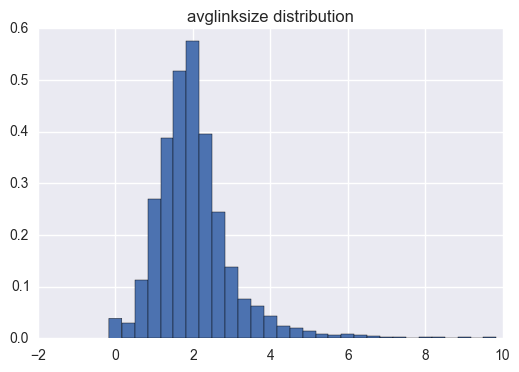

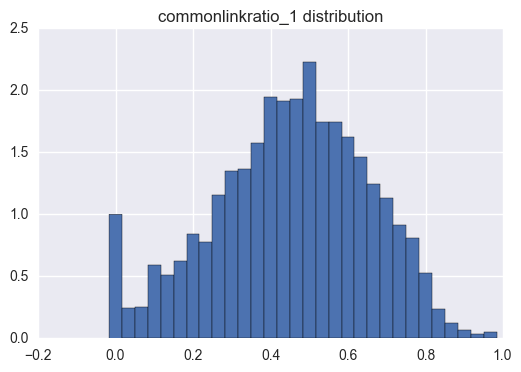

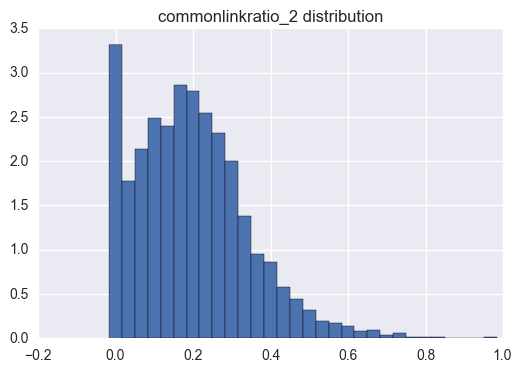

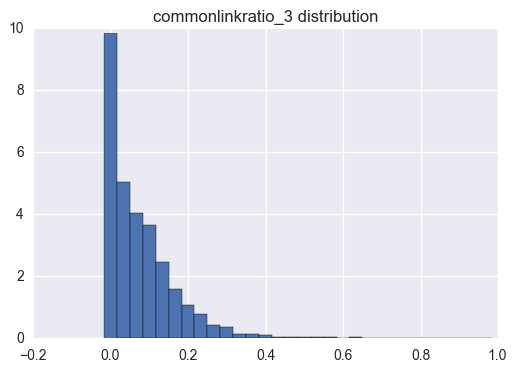

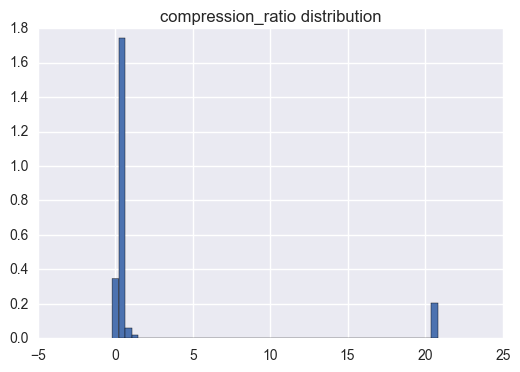

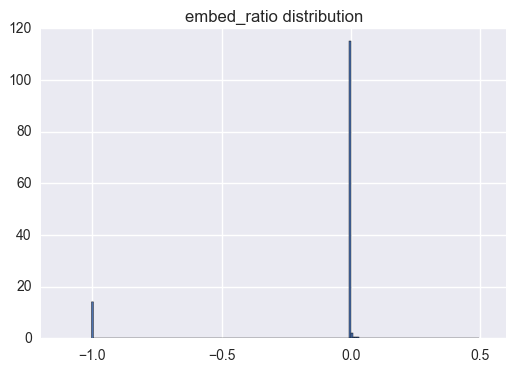

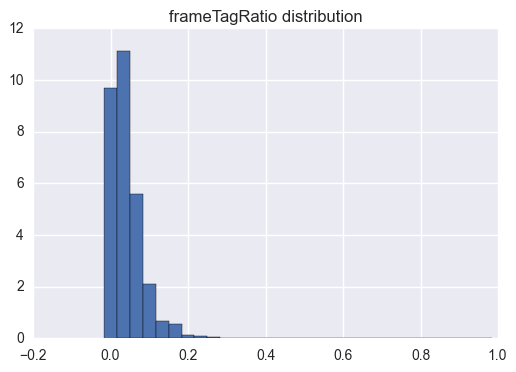

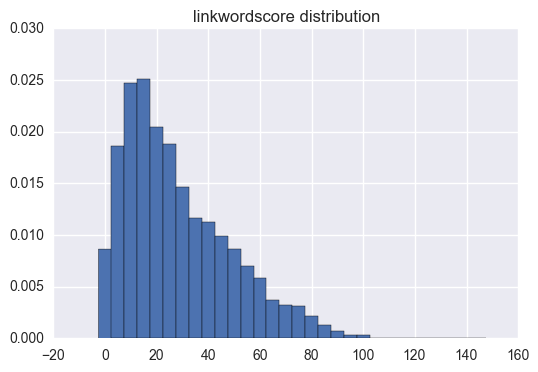

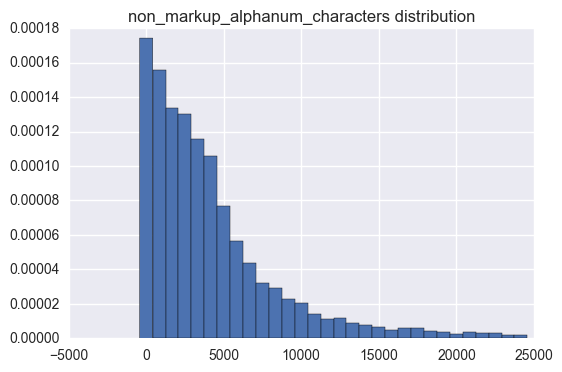

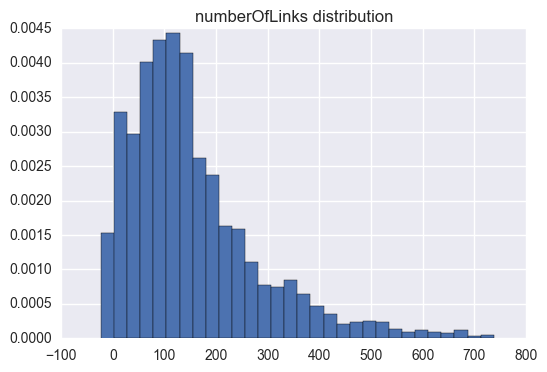

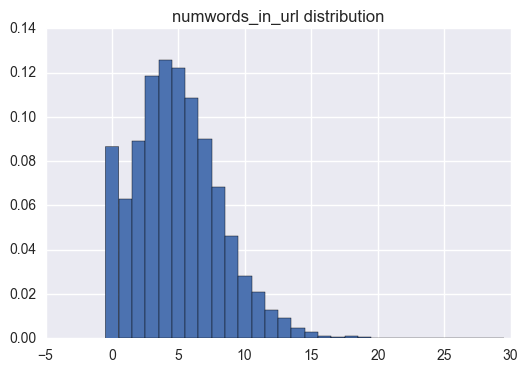

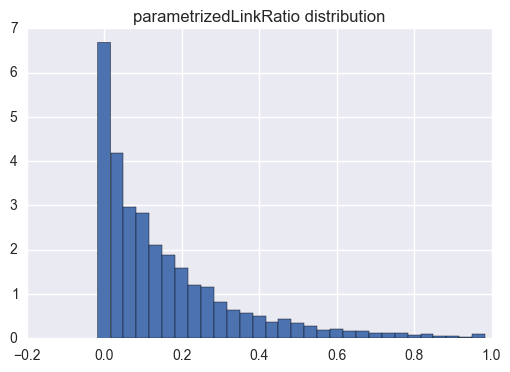

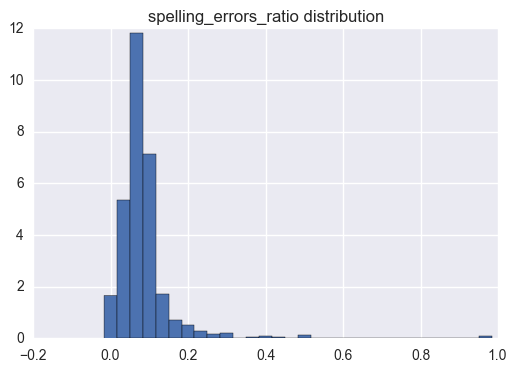

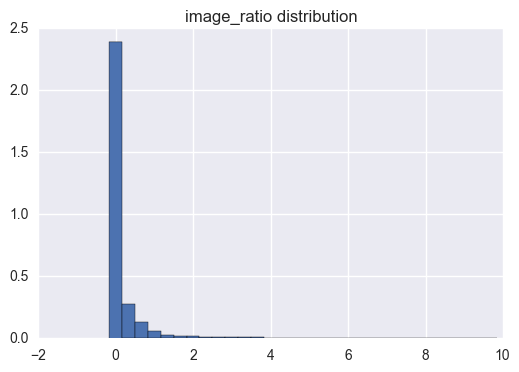

In [13]:

plt.hist(all_data['avglinksize'], normed=True, bins = 30, range=(0,10), align = 'left')
plt.title('avglinksize distribution')
plt.show()

plt.hist(all_data['commonlinkratio_1'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_1 distribution')
plt.show()

plt.hist(all_data['commonlinkratio_2'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_2 distribution')
plt.show()

plt.hist(all_data['commonlinkratio_3'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_3 distribution')
plt.show()

plt.hist(all_data['compression_ratio'], normed=True, bins = 50, align = 'left') #????
plt.title('compression_ratio distribution')
plt.show()

plt.hist(all_data['embed_ratio'], normed=True, bins = 200, range=(-1,0.5), align = 'left')# will become binary
plt.title('embed_ratio distribution')
plt.show()

plt.hist(all_data['frameTagRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('frameTagRatio distribution')
plt.show()

plt.hist(all_data['linkwordscore'], normed=True, bins = 30, range=(0,150), align = 'left')
plt.title('linkwordscore distribution')
plt.show()

plt.hist(all_data['non_markup_alphanum_characters'], normed=True, bins = 30, range=(-10,25000), align = 'left')
plt.title('non_markup_alphanum_characters distribution')
plt.show()

plt.hist(all_data['numberOfLinks'], normed=True, bins = 30, range=(-10,750), align = 'left')
plt.title('numberOfLinks distribution')
plt.show()

plt.hist(all_data['numwords_in_url'], normed=True, bins = 30, range=(0,30), align = 'left')
plt.title('numwords_in_url distribution')
plt.show()

plt.hist(all_data['parametrizedLinkRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('parametrizedLinkRatio distribution')
plt.show()

plt.hist(all_data['spelling_errors_ratio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('spelling_errors_ratio distribution')
plt.show()

plt.hist(all_data['image_ratio'], normed=True, bins = 30, range=(0,10), align = 'left')
plt.title('image_ratio distribution')
plt.show()



### Categorical feature bars

-------------------------------
Histogram for alchemy_category
-------------------------------
unknown               3394
recreation            1701
arts_entertainment    1363
business              1235
health                 706
sports                 566
culture_politics       499
computer_internet      430
science_technology     409
gaming                 110
religion               107
law_crime               42
weather                  4
Name: alchemy_category, dtype: int64



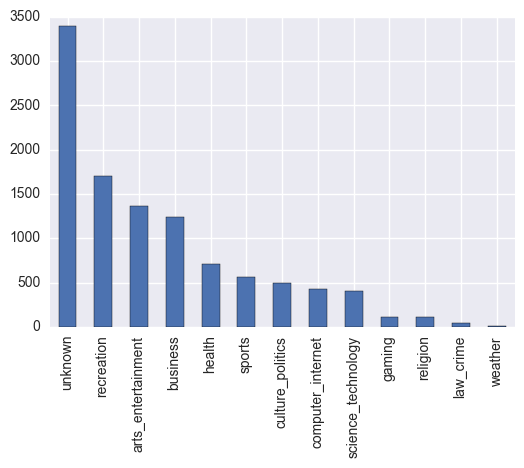

In [16]:
for variable in categorical_variables:
  print ("-------------------------------")
  print ("Histogram for " + variable)
  print ("-------------------------------")
  print (all_data[variable].value_counts())
  print ("")
all_data.alchemy_category.value_counts().plot(kind='bar')

In [18]:
named_labels = train_labels.map({0:'Emerphal', 1:'EverGreen'})
named_labels.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'map'

### Corelations

In [19]:
all_data[ratios].corr()

,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,parametrizedLinkRatio,spelling_errors_ratio,image_ratio,html_ratio
commonlinkratio_1,1.000000,0.805516,0.561159,0.388081,-0.021166,0.007596,-0.291902,-0.077558,-0.052335,-0.067458,-0.200099
commonlinkratio_2,0.805516,1.000000,0.760680,0.555669,-0.037829,0.024076,-0.262819,-0.083728,-0.041608,-0.043157,-0.166438
commonlinkratio_3,0.561159,0.760680,1.000000,0.851192,-0.021917,0.008973,-0.224793,-0.009480,-0.015782,-0.045600,-0.136121
commonlinkratio_4,0.388081,0.555669,0.851192,1.000000,-0.025852,0.008492,-0.188095,0.039001,-0.017570,-0.030707,-0.140531
compression_ratio,-0.021166,-0.037829,-0.021917,-0.025852,1.000000,-0.894583,0.164354,-0.035573,0.351655,-0.208781,0.098001
embed_ratio,0.007596,0.024076,0.008973,0.008492,-0.894583,1.000000,-0.140961,0.039681,-0.329858,0.211974,-0.087971
frameTagRatio,-0.291902,-0.262819,-0.224793,-0.188095,0.164354,-0.140961,1.000000,-0.096711,0.031763,-0.097082,0.393338
parametrizedLinkRatio,-0.077558,-0.083728,-0.009480,0.039001,-0.035573,0.039681,-0.096711,1.000000,-0.010416,0.134253,-0.175521
spelling_errors_ratio,-0.052335,-0.041608,-0.015782,-0.017570,0.351655,-0.329858,0.031763,-0.010416,1.000000,-0.000593,0.023424
image_ratio,-0.067458,-0.043157,-0.045600,-0.030707,-0.208781,0.211974,-0.097082,0.134253,-0.000593,1.000000,-0.177183


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x210FDD50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x27B8D6B0>]], dtype=object)

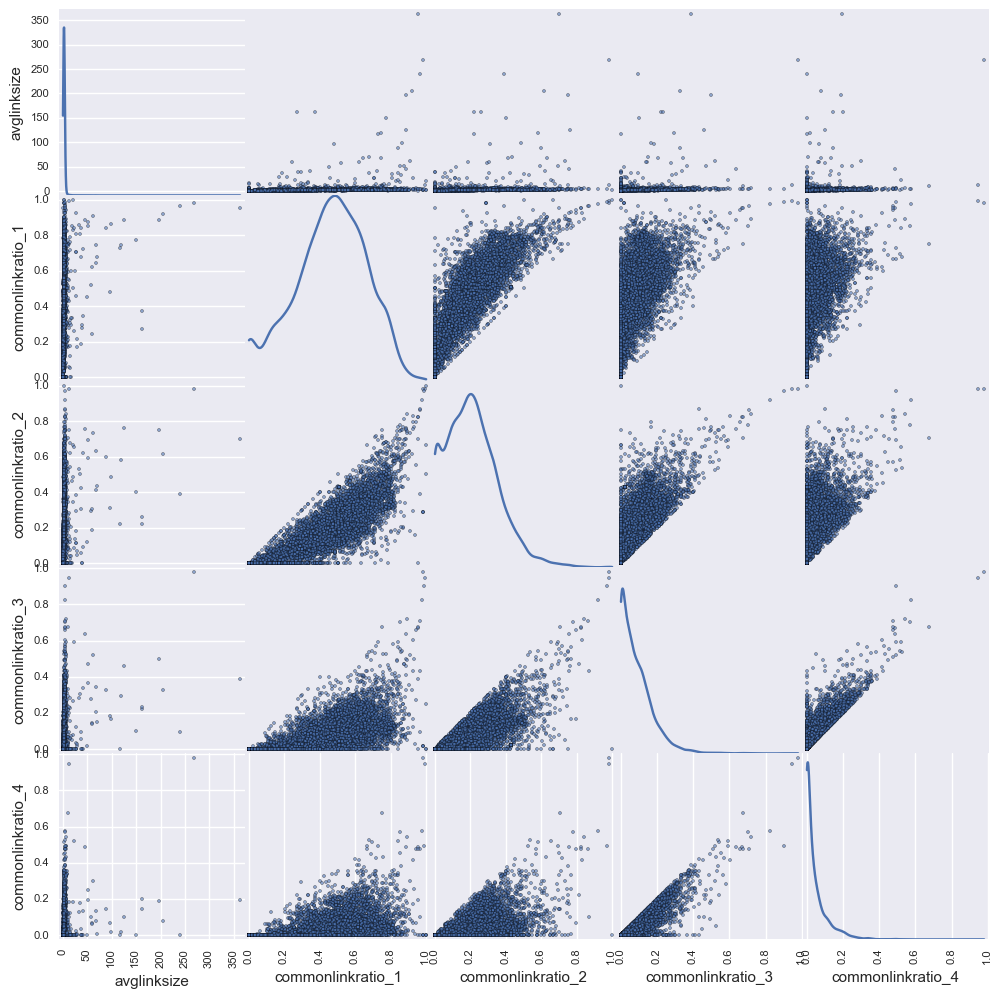

In [60]:
word_link_ratio = filtered_train_data[['avglinksize','commonlinkratio_1','commonlinkratio_2','commonlinkratio_3','commonlinkratio_4']]
pd.tools.plotting.scatter_matrix(word_link_ratio, alpha = 0.6, figsize = (12,12), diagonal = 'kde' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A75EB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1B267C10>]], dtype=object)

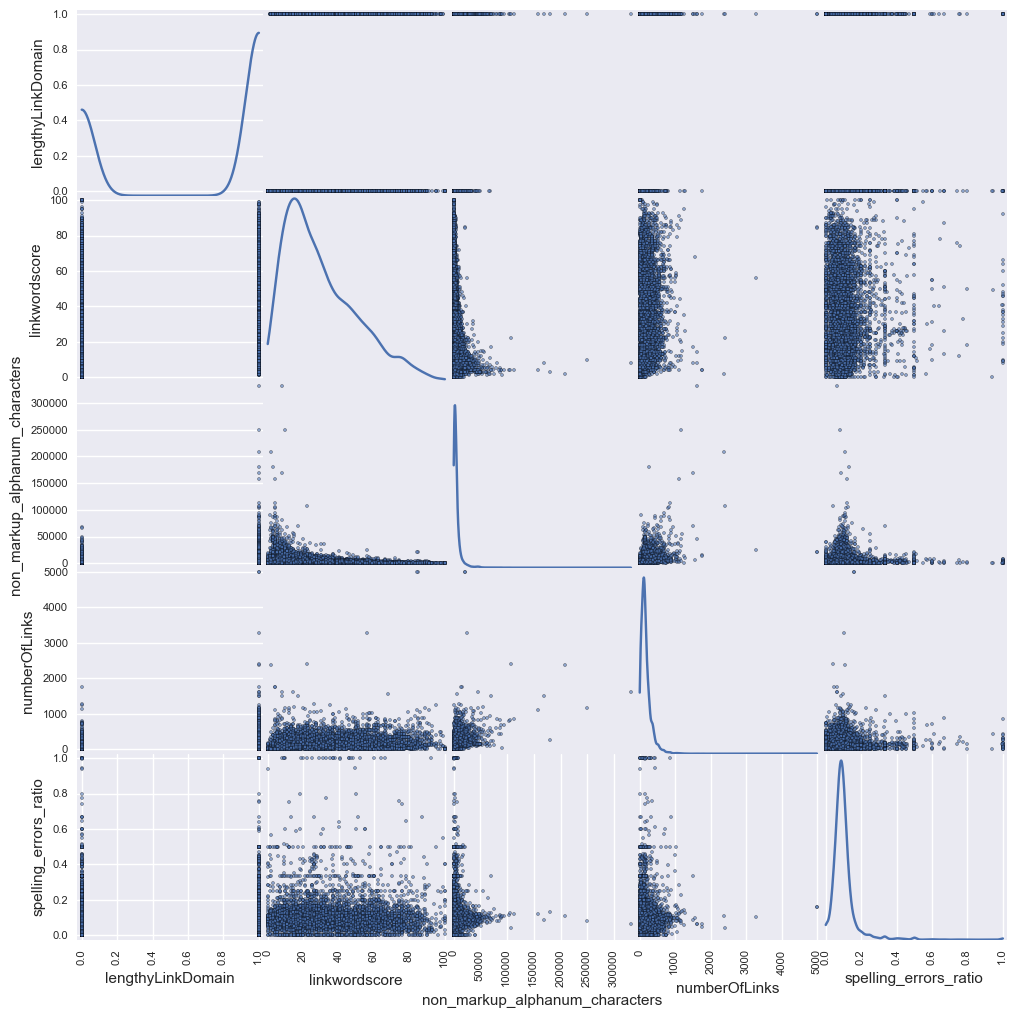

In [21]:
text = all_data[['lengthyLinkDomain','linkwordscore','non_markup_alphanum_characters','numberOfLinks','spelling_errors_ratio']]
pd.tools.plotting.scatter_matrix(text, alpha = 0.6, figsize = (12,12), diagonal = 'kde' )

c:\python27\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
c:\python27\lib\site-packages\matplotlib\axes\_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
c:\python27\lib\site-packages\pandas\tools\plotting.py:412: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A760D50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1BDD9110>]], dtype=object)

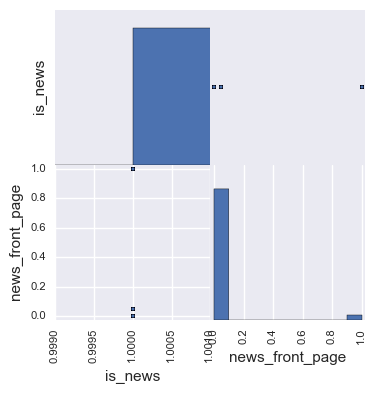

In [22]:
news = all_data[['is_news','news_front_page']]
pd.tools.plotting.scatter_matrix(news, alpha = 0.6, figsize = (4,4), diagonal = 'hist' )

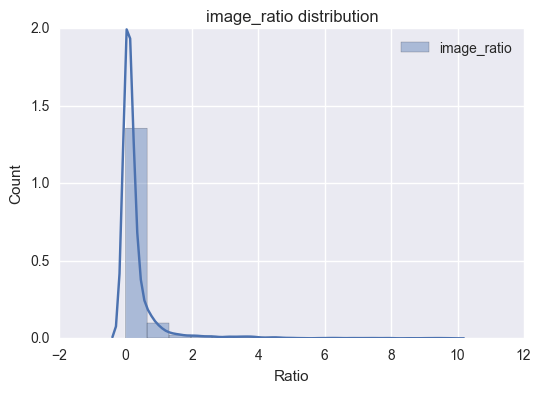

In [23]:
# plt.hist(all_data['image_ratio'], normed=True, bins = 30, range=(0,10), align = 'left')
# plt.title('image_ratio distribution')
# plt.show()
filtered = all_data[(all_data['image_ratio'] > 0) & (all_data['image_ratio'] < 10)]
sns.distplot(filtered.image_ratio, bins = 15, kde = True, label='image_ratio')
plt.title('image_ratio distribution')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.legend(loc="upper right")


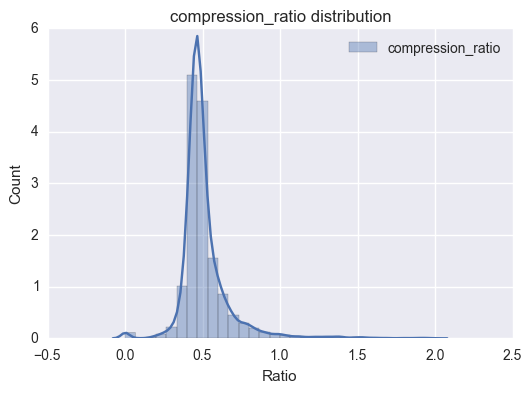

In [24]:
filtered = all_data[(all_data['compression_ratio'] >= 0) & (all_data['compression_ratio'] <= 2)]
sns.distplot(filtered.compression_ratio, bins = 30, kde = True, label='compression_ratio')
plt.title('compression_ratio distribution')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.legend(loc="upper right")


# cleaning

### Remove Outliers

In [58]:
filtered_train_data = train_data.copy()
filtered_train_data = filtered_train_data[filtered_train_data['avglinksize'] < 1000]
filtered_train_data = filtered_train_data[filtered_train_data['numberOfLinks'] < 1500]
filtered_train_data = filtered_train_data[filtered_train_data['non_markup_alphanum_characters'] < 15000]

In [289]:
# filltered_train_data = train_data.copy()
# filltered_train_data = filltered_train_data[filltered_train_data.compression_ratio > 1]
# filltered_train_data = train_data[np.abs(train_data.avglinksize-train_data.avglinksize.mean())<=(2*train_data.avglinksize.std())] #keep only the ones that are within +3 to -3 std.
# filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# # filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [26]:
filtered_train_data = filtered_train_data[filtered_train_data['image_ratio'] <= 4]
filtered_train_data = filtered_train_data[(filtered_train_data['compression_ratio'] <= 2) | (filtered_train_data['compression_ratio'] > 20)] 

#  Data Normalization

In [27]:
regular_cols_to_norm = ['embed_ratio','linkwordscore','avglinksize', 
                        'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url']

filtered_train_data[regular_cols_to_norm] = filtered_train_data[regular_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test_data[regular_cols_to_norm] = test_data[regular_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [28]:
filtered_train_data.ix[filtered_train_data.compression_ratio > 20, 'high_compression_ratio'] = 1
filtered_train_data.ix[filtered_train_data.compression_ratio <= 20, 'high_compression_ratio'] = 0

test_data.ix[test_data.compression_ratio > 20, 'high_compression_ratio'] = 1
test_data.ix[test_data.compression_ratio <= 20, 'high_compression_ratio'] = 0

In [29]:
filtered_train_data.ix[filtered_train_data.compression_ratio > 20, 'compression_ratio'] = 2

test_data.ix[test_data.compression_ratio > 20, 'compression_ratio'] = 2

filtered_train_data[['compression_ratio', 'high_compression_ratio']].describe()

,compression_ratio,high_compression_ratio
count,6774.000000,6774.000000
mean,0.639779,0.087688
std,0.445486,0.282862
min,0.000000,0.000000
25%,0.445262,0.000000
50%,0.485923,0.000000
75%,0.579146,0.000000
max,2.000000,1.000000


In [30]:
special_cols_to_norm = ['compression_ratio', 'image_ratio']
filtered_train_data[special_cols_to_norm] = filtered_train_data[special_cols_to_norm].apply(lambda x: (x - x.min())
                                                                                            / (x.max() - x.min()))
test_data[special_cols_to_norm] = test_data[special_cols_to_norm].apply(lambda x: (x - x.min())
                                                                        / (x.max() - x.min()))
special_cols_to_norm.append('high_compression_ratio')
filtered_train_data[special_cols_to_norm].describe()

,compression_ratio,image_ratio,high_compression_ratio
count,6774.000000,6774.000000,6774.000000
mean,0.319890,0.231365,0.087688
std,0.222743,0.125363,0.282862
min,0.000000,0.000000,0.000000
25%,0.222631,0.205519,0.000000
50%,0.242962,0.216777,0.000000
75%,0.289573,0.246616,0.000000
max,1.000000,1.000000,1.000000


### Drop Unnecessary Column

In [383]:
# normalized_train_data = normalized_train_data.drop('compression_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('embed_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('image_ratio', axis = 1)

# normalized_train_data = normalized_train_data.join(df_alchemy_category) #don't run more than 1 time!
# normalized_train_data = normalized_train_data.drop('alchemy_category', axis = 1)
# normalized_train_data = normalized_train_data.drop(['url', 'urlid'], axis = 1)


In [ ]:
#Train-test split

In [31]:
train_set = filtered_train_data.copy()

test_set = test_data.copy()

## Randomly Shuffle Training Data

In [32]:
train_data = normalized_train_data.sample(frac = 1)

NameError: name 'normalized_train_data' is not defined

# TF - IDF

In [33]:
data = train_set.append(test_set, ignore_index = True)
train_len = len(train_set)
train_labels = train_set['label']
all_data_text = data['boilerplate']

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                      analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf=1, smooth_idf=1,
                      sublinear_tf=1)

rd = lm.LogisticRegression(penalty='l2', dual=True, tol=0.0001,
                           C=1, fit_intercept=True, intercept_scaling=1.0,
                           class_weight=None, random_state=None)

# clf = svm.SVC(probability=True)


print "fitting pipeline"
tfidf_all_data = tfv.fit_transform((np.array(all_data_text)))  # returns a matrix of [n_samples, n_features]

print "transforming data"
tfidf_train = tfidf_all_data[:train_len]
tfidf_test = tfidf_all_data[train_len:]

print "training logistic regression"
rd.fit(tfidf_train, train_labels)
print "getting logistic regression predictions"
prediction_all_lr = rd.predict_proba(tfidf_all_data)[:, 1]
data['tfidf_logistic_regression_prediction'] = prediction_all_lr
train_set['tfidf_logistic_regression_prediction'] = prediction_all_lr[:train_len]
test_set['tfidf_logistic_regression_prediction'] = prediction_all_lr[train_len:]

# print "training SVM"
# clf.fit(tfidf_train, train_labels)
# print "getting SVM predictions"
# prediction_all_svm = clf.predict_proba(tfidf_all_data)[:, 1]
# all_data['tfidf_svm_prediction'] = prediction_all_svm

print "dropping 'boilerplate' column from all_data"
train_set.drop('boilerplate', 1, inplace=True)
test_set.drop('boilerplate', 1, inplace=True)

fitting pipeline
transforming data
training logistic regression
getting logistic regression predictions
dropping 'boilerplate' column from all_data


# Feature Selection

In [107]:
data = train_set.append(test_set, ignore_index = True)
train_len = len(train_set)

alchemy_category_dv = pd.get_dummies(data['alchemy_category'])
pp_set = pd.concat([data, alchemy_category_dv], axis=1)

pp_train_set = pp_set[:train_len]
pp_test_set = pp_set[train_len:]

pp_test_urlids = pp_test_set['urlid']
pp_train_labels = pp_train_set['label']
pp_train_set = pp_train_set.drop(['url', 'urlid', 'alchemy_category', 'label'] , 1)
pp_test_set = pp_test_set.drop(['url', 'urlid', 'alchemy_category', 'label'] , 1)

# ==============START COPY HERE=================

## Logistic Regression and SVM feature selection

In [108]:
pp_train_set = pp_train_set.drop(['avglinksize', 'lengthyLinkDomain', 'linkwordscore'] , 1)
pp_test_set = pp_test_set.drop(['avglinksize', 'lengthyLinkDomain', 'linkwordscore'] , 1)

pp_train_set['link_ratio_average'] = pp_train_set.apply(lambda row: np.average([row['commonlinkratio_1'], row['commonlinkratio_2'], row['commonlinkratio_3'], row['commonlinkratio_4']]), axis=1)
pp_train_set = pp_train_set.drop(['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4'] , 1)
pp_test_set['link_ratio_average'] = pp_test_set.apply(lambda row: np.average([row['commonlinkratio_1'], row['commonlinkratio_2'], row['commonlinkratio_3'], row['commonlinkratio_4']]), axis=1)
pp_test_set = pp_test_set.drop(['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4'] , 1)

def plot_cross_val(cs, cv_scores):
    plt.plot(cs, cv_scores)
    plt.title("ROC AUC as a function of C")
    plt.xlabel("C")
    plt.ylabel("ROC AUC")
    ax = plt.axes()
    ax.set_xscale('log')
    plt.show()

## Logistic Regression parameter optimization

C=0.01: 0.959149155052
C=0.1: 0.959224629102
C=1: 0.958832830694
C=10: 0.958503269171
C=100: 0.958459669288
C=1000: 0.95845531157
C=10000: 0.958450948807
C=100000: 0.958451824387
C=1000000: 0.958464029529


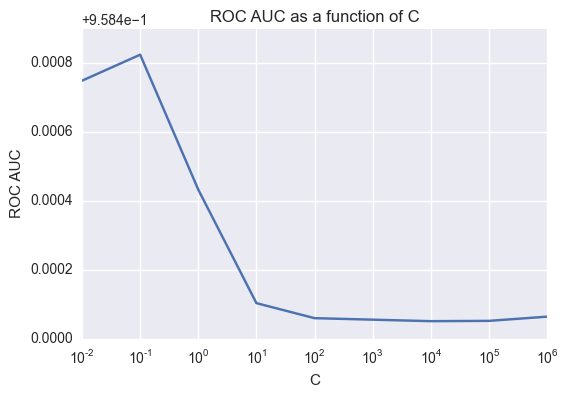

In [109]:
cv_scores = []
cs = []
for c in range(-2,7):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=10**c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (10**c, np.average(res))
    cs.append(10**c)
    cv_scores.append(np.average(res))

plot_cross_val(cs, cv_scores)

C=0.01: 0.959149155052
C=0.016681005372: 0.959149155052
C=0.0278255940221: 0.959127328616
C=0.0464158883361: 0.959079320549
C=0.0774263682681: 0.959109438508
C=0.129154966501: 0.959229991088
C=0.215443469003: 0.959142942718
C=0.35938136638: 0.959105600588
C=0.599484250319: 0.958946154056
C=1.0: 0.958832833218


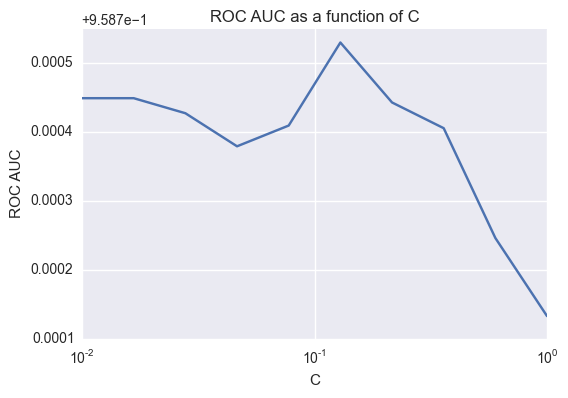

LR highest score C = 0.129154966501


In [111]:
cv_scores = []
for c in np.logspace(-2,0, num=10):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-2,0, num=10), cv_scores)
lr_selceted_c = np.logspace(-2,0, num=10)[cv_scores.index(max(cv_scores))]
print "LR highest score C = %s" % lr_selceted_c

## Logistic Regression run

In [112]:
lr = lm.LogisticRegression(penalty="l1", C=lr_selceted_c)
lr.fit(pp_train_set, pp_train_labels)
lr_train_prediction = lr.predict_proba(pp_train_set)
lr_test_prediction = lr.predict_proba(pp_test_set)

fpr, tpr, thresholds = metrics.roc_curve(pp_train_labels, lr_train_prediction[:,1])
lr_train_auc = metrics.auc(fpr, tpr)
print "logistic regression train set auc:", lr_train_auc

for_csv = pd.DataFrame()
for_csv['urlid'] = pp_test_urlids
for_csv['label'] = lr_test_prediction[:,1]
for_csv.to_csv("lr_test_predictions.csv", index=False)

logistic regression train set auc: 0.959814053551


## SVM parameter optimization

C=1e-05: 0.92417857406
C=0.0001: 0.924375756355
C=0.001: 0.924465592957
C=0.01: 0.924484780035
C=0.1: 0.955393332566
C=1: 0.959041314794
C=10: 0.959563758931
C=100: 0.959427478701
C=1000: 0.952927798149
C=10000: 0.946062440261


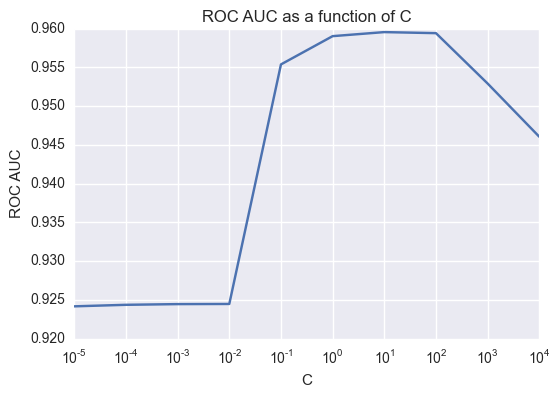

In [113]:
cv_scores = []
cs = []
for c in range(-5,5):
    res = cross_val_score(svm.SVC(C=10**c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (10**c, np.average(res))
    cs.append(10**c)
    cv_scores.append(np.average(res))
    
plot_cross_val(cs, cv_scores)

C=0.1: 0.955393332566
C=0.278255940221: 0.957825562113
C=0.774263682681: 0.958834652508
C=2.15443469003: 0.959336897729
C=5.99484250319: 0.959413002601
C=16.681005372: 0.959694566151
C=46.4158883361: 0.959721555233
C=129.154966501: 0.959079547645
C=359.38136638: 0.956263826353
C=1000.0: 0.952927798149


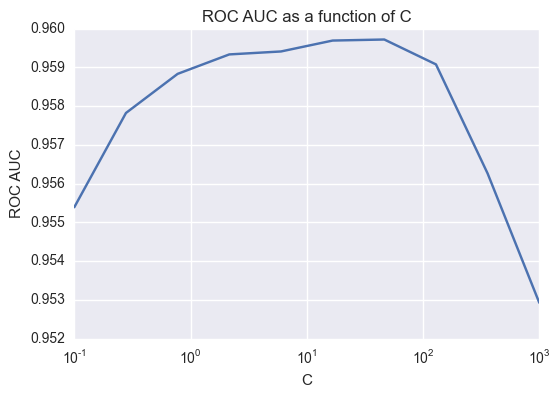

SVM highest score C = 46.4158883361


In [114]:
cv_scores = []
for c in np.logspace(-1,3, num=10):
    res = cross_val_score(svm.SVC(C=c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-1,3, num=10), cv_scores)
svm_selceted_c = np.logspace(-1,3, num=10)[cv_scores.index(max(cv_scores))]
print "SVM highest score C = %s" % svm_selceted_c

gamma=0.0001: 0.956912457571
gamma=0.00035938136638: 0.958620024203
gamma=0.00129154966501: 0.95933352914
gamma=0.00464158883361: 0.959227081737
gamma=0.016681005372: 0.959691089061
gamma=0.0599484250319: 0.958708046562
gamma=0.215443469003: 0.9495077798
gamma=0.774263682681: 0.940537074157
gamma=2.78255940221: 0.924392243515
gamma=10.0: 0.907515664568


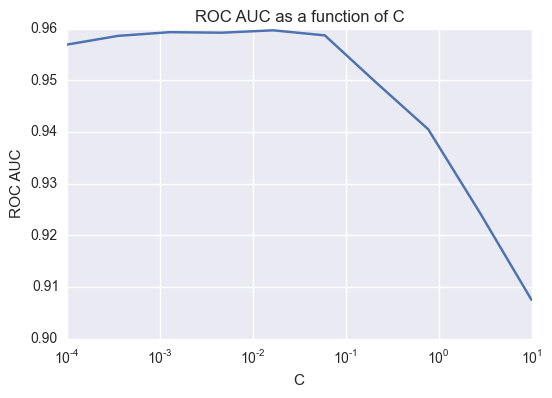

SVM highest score gamma = 0.016681005372


In [106]:
cv_scores = []
for g in np.logspace(-4,1, num=10):
    res = cross_val_score(svm.SVC(C=svm_selceted_c, gamma=g), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "gamma=%s: %s" % (g, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-4,1, num=10), cv_scores)
svm_selceted_gamma = np.logspace(-4,1, num=10)[cv_scores.index(max(cv_scores))]
print "SVM highest score gamma = %s" % svm_selceted_gamma

## SVM run

Didn't use highest gamma because auto gamma gave better results

In [82]:
svm_model = svm.SVC(probability=True, C=svm_selceted_c)
svm_model.fit(pp_train_set, pp_train_labels)
svm_train_prediction = svm_model.predict_proba(pp_train_set)
svm_test_prediction = svm_model.predict_proba(pp_test_set)

fpr, tpr, thresholds = metrics.roc_curve(pp_train_labels, svm_train_prediction[:,1])
svm_train_auc = metrics.auc(fpr, tpr)
print "svm train set auc:", svm_train_auc

for_csv = pd.DataFrame()
for_csv['urlid'] = pp_test_urlids
for_csv['label'] = svm_test_prediction[:,1]
for_csv.to_csv("svm_test_predictions.csv", index=False)

svm train set auc: 0.96085514612


# ====================STOP COPY HERE========================

Feature ranking:
1. feature 23 (tfidf_logistic_regression_prediction)
   score: 0.567727
2. feature 17 (non_markup_alphanum_characters)
   score: 0.038564
3. feature 9 (frameTagRatio)
   score: 0.032879
4. feature 15 (linkwordscore)
   score: 0.027758
5. feature 6 (compression_ratio)
   score: 0.025422
6. feature 1 (avglinksize)
   score: 0.025271
7. feature 21 (spelling_errors_ratio)
   score: 0.024864
8. feature 12 (image_ratio)
   score: 0.023179
9. feature 18 (numberOfLinks)
   score: 0.023149
10. feature 11 (html_ratio)
   score: 0.023071
11. feature 2 (commonlinkratio_1)
   score: 0.021535
12. feature 20 (parametrizedLinkRatio)
   score: 0.020615
13. feature 4 (commonlinkratio_3)
   score: 0.020564
14. feature 3 (commonlinkratio_2)
   score: 0.020220
15. feature 0 (alchemy_category_score)
   score: 0.019471
16. feature 5 (commonlinkratio_4)
   score: 0.015933
17. feature 19 (numwords_in_url)
   score: 0.015633
18. feature 31 (recreation)
   score: 0.009528
19. feature 34 (sports)

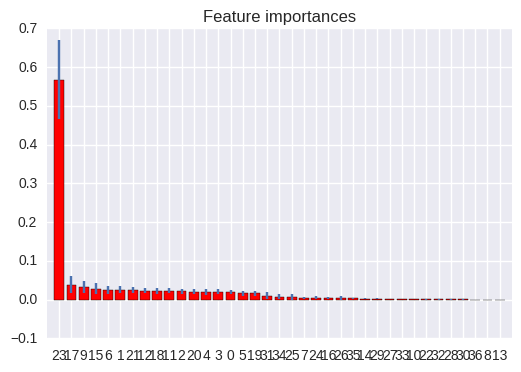

In [342]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)
labels = pp_train_set['label'].values
data = pp_train_set.drop('label', 1)
data_to_fit = pp_train_set.drop('label', 1).values

forest.fit(data_to_fit, labels)
forest.predict()


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. feature %d (%s)\n   score: %f" % (f + 1, indices[f], list(data)[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_to_fit.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_to_fit.shape[1]), indices)
plt.xlim([-1, data_to_fit.shape[1]])
plt.show()

In [229]:
data = filltered_normalized_all_data.copy()

In [214]:
all_data['tfidf_logistic_regression_prediction'].head(10)

0    0.096375
1    0.294938
2    0.696625
3    0.641601
4    0.157165
5    0.386919
6    0.384804
7    0.316148
8    0.477404
9    0.912897
Name: tfidf_logistic_regression_prediction, dtype: float64

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_labels, train_prediction)
metrics.auc(fpr, tpr)

## Visualization

In [29]:
print(train_data[train_data['class'] == '0'])

        age         workclass     education education-num      marital-status  \
27952  21.0           Private       HS-grad             9       Never-married   
18886  54.0           Private       HS-grad             9  Married-civ-spouse   
11885  40.0           Private    Assoc-acdm            12       Never-married   
25927  25.0           Private     Bachelors            13       Never-married   
4963   47.0           Private       Masters            14       Never-married   
985    63.0           Private     Assoc-voc            11            Divorced   
26040  29.0           Private       HS-grad             9       Never-married   
25458  26.0           Private    Assoc-acdm            12  Married-civ-spouse   
26029  52.0  Self-emp-not-inc     Assoc-voc            11  Married-civ-spouse   
27345  50.0           Private     Bachelors            13  Married-civ-spouse   
8248   23.0           Private     Bachelors            13  Married-civ-spouse   
6799   35.0         State-go

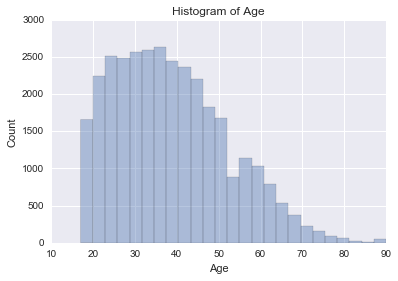

In [30]:
sns.distplot(train_data.age, bins = 25, kde = False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.show()

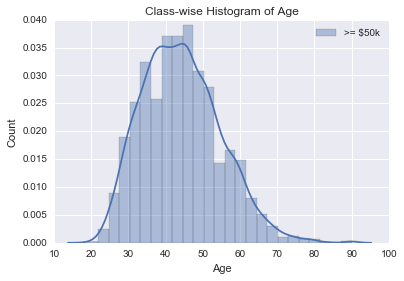

In [31]:
sns.distplot(train_data[train_data['class'] == '1'].age, bins = 25, kde = True, label = ">= $50k")
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

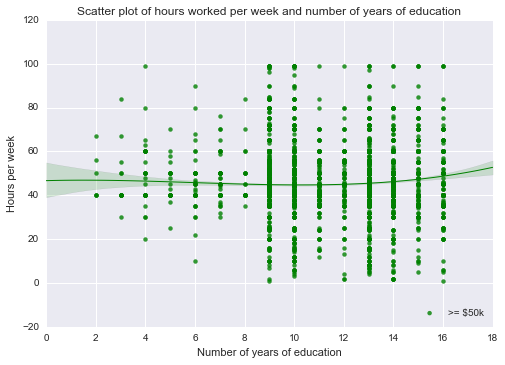

In [32]:
sns.set(color_codes=True)
train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot('education-num', 'hours-per-week', train_data[train_data['class'] == '1'], 
            scatter_kws={"marker": ".", "color": "green"},
            line_kws = {"linewidth": "1", "color": "green"},
            order = 3,
            label = '>= $50k')
plt.xlabel('Number of years of education')
plt.ylabel('Hours per week')
plt.legend(loc="lower right")
plt.title("Scatter plot of hours worked per week and number of years of education")

## Binning numeric values

In [33]:
def binning(col,bin_num):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  

  #if no labels provided, use default labels 0 ... (n-1)
  
  labels = ['BIN_'+str(i) for i in range(bin_num)]

  #Binning using cut function of pandas
  #colBin = pd.cut(col,bin_num,include_lowest=True)
  colBin = pd.cut(col,bin_num,labels=labels,include_lowest=True)
  return colBin

In [34]:
age=train_data['age'].head(5)
age_b=binning(train_data['age'],20).head(5)
for i in enumerate(zip(age,age_b)):
    print(i[1])

(21.0, 'BIN_1')
(59.0, 'BIN_11')
(54.0, 'BIN_10')
(40.0, 'BIN_6')
(25.0, 'BIN_2')


In [35]:
#bin all numeric variables:
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']


numeric_variables_binned = []
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    train_data[binned_output_column] = binning(train_data[variable],20)
    test_data[binned_output_column] = binning(test_data[variable],20)
    numeric_variables_binned.append(binned_output_column)

In [36]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,hours-per-week_binned,age_binned,capital-gain_binned,capital-loss_binned
27952,21.0,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,32.0,United-States,0,BIN_6,BIN_1,BIN_0,BIN_0
15390,59.0,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,1,BIN_7,BIN_11,BIN_0,BIN_0
18886,54.0,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,44.0,United-States,0,BIN_8,BIN_10,BIN_0,BIN_0
11885,40.0,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_6,BIN_0,BIN_0
25927,25.0,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_2,BIN_0,BIN_0


## One Hot encoding:

In [37]:
pd.get_dummies(train_data['relationship'],prefix='relationship').head(10)

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
27952,0.0,0.0,0.0,1.0,0.0,0.0
15390,1.0,0.0,0.0,0.0,0.0,0.0
18886,1.0,0.0,0.0,0.0,0.0,0.0
11885,0.0,1.0,0.0,0.0,0.0,0.0
25927,0.0,1.0,0.0,0.0,0.0,0.0
5431,0.0,0.0,0.0,0.0,0.0,1.0
4963,0.0,1.0,0.0,0.0,0.0,0.0
985,0.0,1.0,0.0,0.0,0.0,0.0
26040,0.0,1.0,0.0,0.0,0.0,0.0
1463,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Encode all binned numeric columns and categorical columns with oneHot
oh_train = train_data['class']
oh_test = test_data['class']

for variable in numeric_variables_binned+categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)
    
    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)

In [61]:
#check for missing values:
missing=[]
for i in oh_train.keys():
    if i not in oh_test.keys():
        missing.append(i)
for i in missing:
    oh_test[i]=0.0

## Build the model: Logistic regression

In [62]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

#separate labels from data
train_class = oh_train['class']
oh_train_data= oh_train.drop('class',axis=1)

In [63]:
logreg.fit(oh_train_data, train_class)
print(logreg)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


## Evaluate results

In [90]:
from sklearn import metrics

test_class = oh_test['class']


expected = test_class.values
oh_test_data= oh_test.drop('class',axis=1)
predicted = logreg.predict(oh_test_data)
predicted_probs = logreg.predict_proba(oh_test_data)

In [103]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.81      0.97      0.89     12435
          1       0.76      0.28      0.41      3846

avg / total       0.80      0.81      0.77     16281

[ 0.00229664  0.23970629  0.08784965 ...,  0.25690392  0.16952656
  0.30020259]


## Cross-validation

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, oh_test_data, test_class, cv=5)

In [86]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.01)


## Understanding Model Performance

In [68]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(expected,predicted):
  y_true = expected
  y_score = predicted
  #y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)

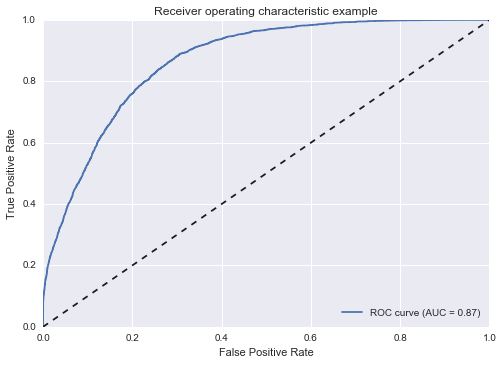

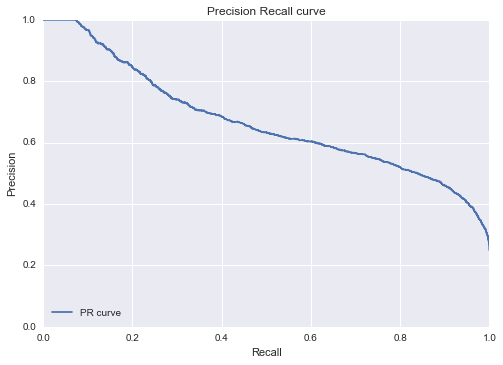

In [104]:
#plotMetrics(expected.astype('int'),predicted.astype('int'))
plotMetrics(expected.astype('int'),predicted_probs[:,1])